In [5]:
import urllib.request
import json
import pandas as pd
import requests
import shutil
import os


url = (
    "https://pixabay.com/api/?key=42732485-b4c1847a3529ea910e8e5fdeb&q=animaux&image_type=photo&per_page=100"
)
response = urllib.request.urlopen(url)
responsedata = json.loads(response.read().decode("utf-8"))
responsedata

def download_image(url):

    headers = {"User-Agent": "Mozilla/5.0"}
    request = requests.get(url, allow_redirects=True, headers=headers, stream=True)
    if request.status_code == 200:
        filename=os.path.join("/images", os.path.basename(url))
        print(os.path.basename(url))
        with open(filename, "wb") as image:
            request.raw.decode_content = True
            shutil.copyfileobj(request.raw, image)
    return request.status_code

array = []

for result in responsedata["hits"]:
    array.append(
        (
            result["id"],
            result["tags"],
            result["largeImageURL"],
            result["imageWidth"],
            result["imageHeight"],
            result["imageSize"],
            result["likes"], 
            result["user"],
            result["largeImageURL"].split('.')[-1]
        )
    )

dataframe = pd.DataFrame(array, columns=["id", "tags", "largeImageURL", "imageWidth","imageHeight","imageSize", "likes", "user", "format"])
dataframe = dataframe.astype(
    dtype={"id": "<U200", "tags": "<U200", "largeImageURL": "<U200","imageWidth": "<U200","imageHeight": "<U200","imageSize": "<U200", "likes": "<U200", "user": "<U200", "format": "<U200"}
)
dataframe.largeImageURL.apply(download_image)
dataframe


 

FileNotFoundError: [Errno 2] No such file or directory: '/images\\gb324d4a097fd47f299ee762aaba7b23b018775bebc61921b9afe70a0b6700582a0b4779625503f9cf52378fe6adae5f5553274f8ef74cebb940ded1f3605d792_1280.jpg'

On va stocker id, tags, largeImageURL, imageWidth, imageHeight, imageSize, likes, format de l'image en prenant ce qu'il y a après le .; user

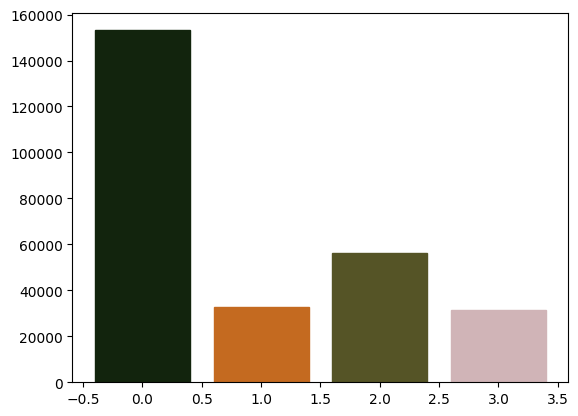

In [60]:
#Test code
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("loup.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )
plot.show()